1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [2]:
import pandas as pd
PATH = "D:/Kì 6/Nhập môn học máy/Thực hành/Lab02/heart.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

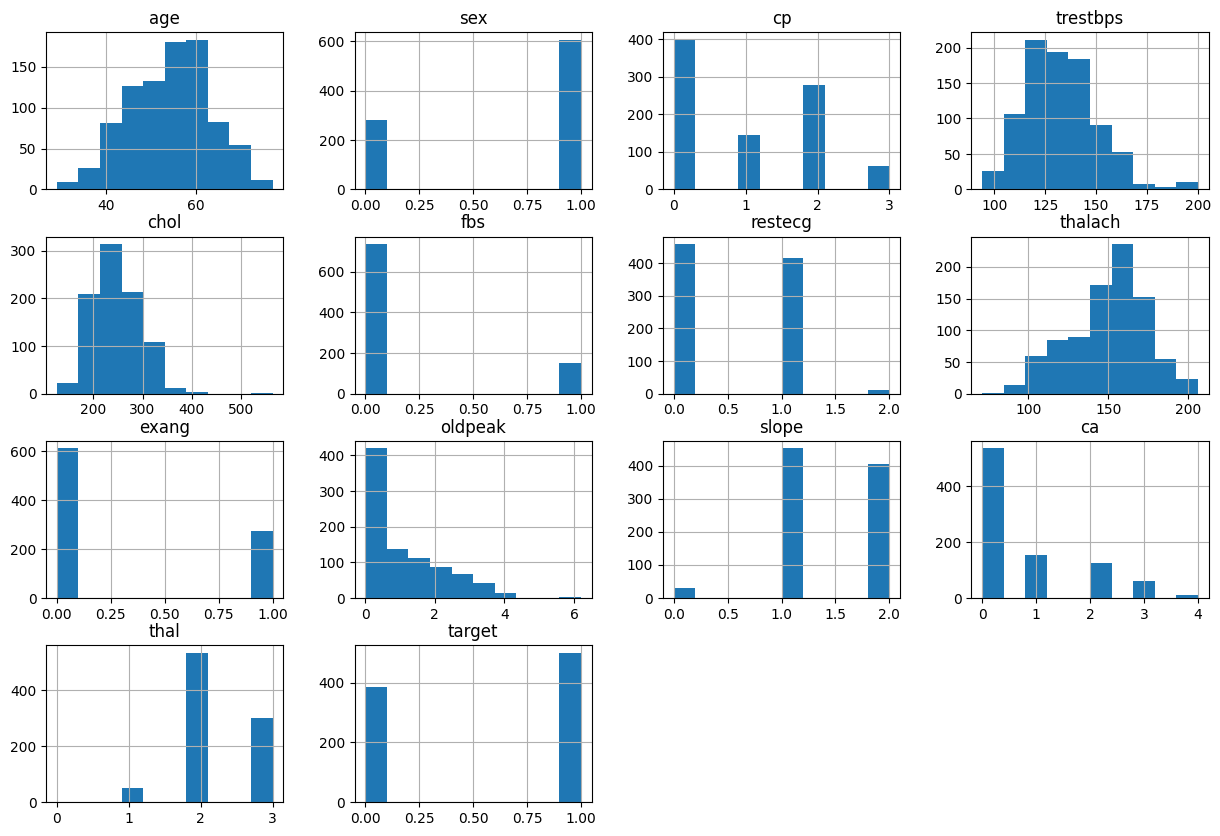

In [3]:
df.hist(figsize=(15, 10))

## Data Analysis

In [4]:
# Basic statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print("Continous Columns")
df_continous = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
print(df_continous)

Continous Columns
     age  trestbps  chol  thalach  oldpeak
0     46       120   249      144      0.8
1     71       160   302      162      0.4
2     71       160   303      163      0.4
3     71       160   304      164      0.4
4     71       160   305      165      0.4
..   ...       ...   ...      ...      ...
881   68       120   211      115      1.5
882   44       108   141      175      0.6
883   52       128   255      161      0.0
884   59       160   273      125      0.0
885   54       120   188      113      1.4

[886 rows x 5 columns]


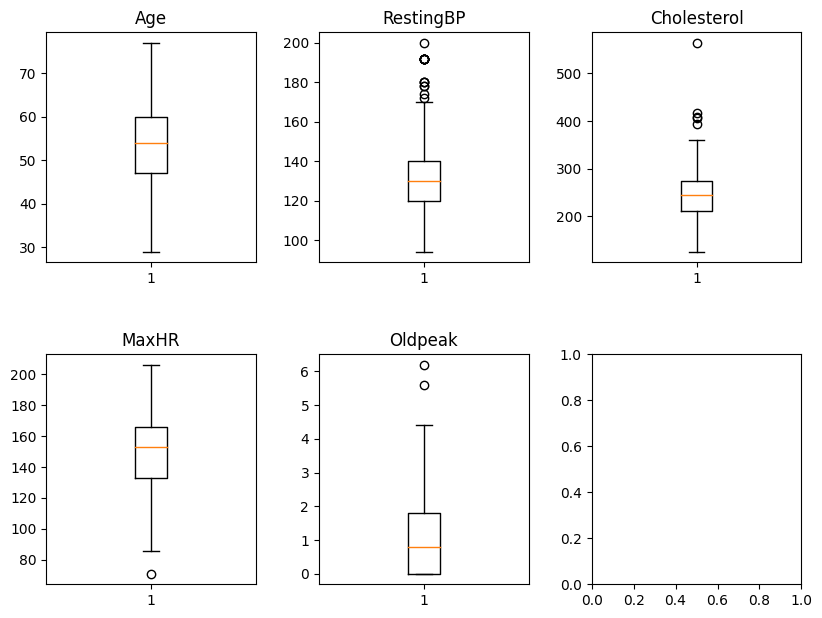

In [6]:
# Show boxplot of continous columns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3)
ax[0,0].boxplot(df['age'])
ax[0,0].set_title('Age')

ax[0,1].boxplot(df['trestbps'])
ax[0,1].set_title('RestingBP')

ax[0,2].boxplot(df['chol'])
ax[0,2].set_title('Cholesterol')

ax[1,0].boxplot(df['thalach'])
ax[1,0].set_title('MaxHR')

ax[1,1].boxplot(df['oldpeak'])
ax[1,1].set_title('Oldpeak')
fig.subplots_adjust(left=0.02, right=1.2, bottom=0.05, top=1.2,
                    hspace=0.4, wspace=0.3)

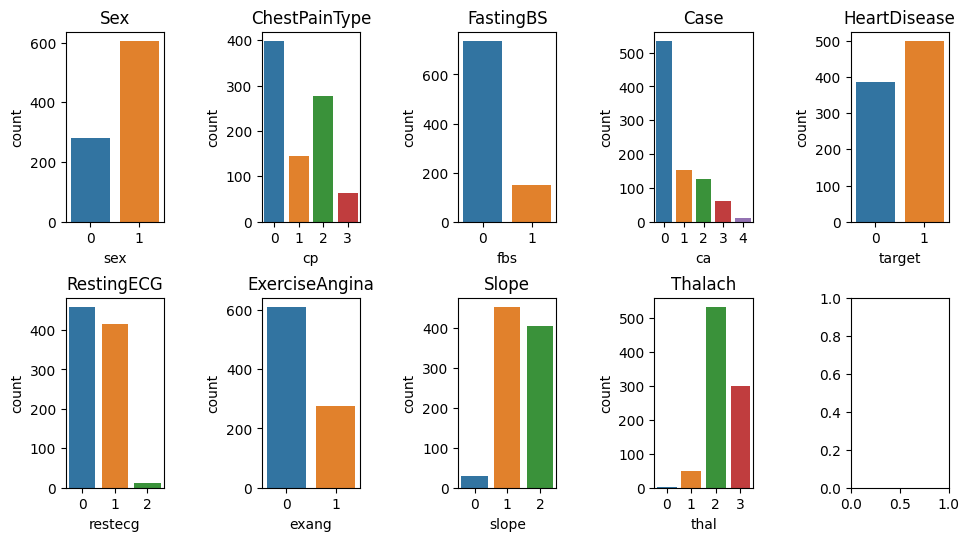

In [7]:
# Show Countplot of Categorical columns
import seaborn as sns

fig, ax = plt.subplots(2, 5)

sns.countplot(x=df['sex'], ax=ax[0, 0]).set_title('Sex')
sns.countplot(x=df['cp'], ax=ax[0, 1]).set_title('ChestPainType')
sns.countplot(x=df['fbs'], ax=ax[0, 2]).set_title('FastingBS')
sns.countplot(x=df['ca'], ax=ax[0, 3]).set_title('Case')

sns.countplot(x=df['restecg'], ax=ax[1, 0]).set_title('RestingECG')
sns.countplot(x=df['exang'], ax=ax[1, 1]).set_title('ExerciseAngina')
sns.countplot(x=df['slope'], ax=ax[1, 2]).set_title('Slope')
sns.countplot(x=df['thal'], ax=ax[1, 3]).set_title('Thalach')

sns.countplot(x=df['target'], ax=ax[0, 4]).set_title('HeartDisease')

fig.subplots_adjust(left=0.02, right=1.4, bottom=0.05, top=1.0,
                    hspace=0.4, wspace=1)


## Preprocessing

In [8]:
# Find missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Feature Engineering

<AxesSubplot: >

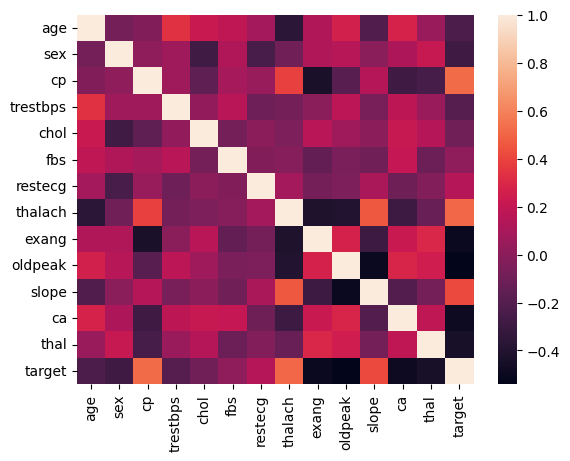

In [9]:
# Heatmap
import seaborn as sns
from sklearn import preprocessing

sns.heatmap(df.corr()) # Show heatmap after normalized data

In [10]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('target', axis=1, inplace=False).values
    y = df['target']
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [11]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

## Logistic Regression

In [77]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error


def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear'))
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model


def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of logistic model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY))#Todo: output your error
pred = model.predict(testX)
print("mean absolute error of logistic model on test set ", mean_absolute_error(y_pred=pred, y_true=testY))#Todo: output your error
print()
logistic_F1 = calculate_performance(testY, pred)
print("Main score : ", logistic_F1)
print()
print(classification_report(testY, pred))


mean absolute error of logistic model on train set  0.04096045197740113
mean absolute error of logistic model on test set  0.06179775280898876

precision 0.9245283018867925
recall 0.9702970297029703
accuracy 0.9382022471910112
F1 0.9468599033816426
Main score :  0.9468599033816426

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        77
           1       0.92      0.97      0.95       101

    accuracy                           0.94       178
   macro avg       0.94      0.93      0.94       178
weighted avg       0.94      0.94      0.94       178



In [79]:

def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. Nếu đánh giá mô hình qua precision và recall và mong muốn cả 2 đều cao "\
            "nhưng nếu chúng ta điều chỉnh 1 trong 2 quá cao sẽ dẫn đến cái còn lại sẽ giảm "\
            "Vì thế chúng ta cần cân bằng 2 đại lượng này. F1 Score chính là chỉ số dung hòa precision và recall bằng cách sử dụng harmonic mean của chúng" \
            "F1 có thể được sử dụng cho cả đánh giá theo lớp và tổng thể. Nếu F1 Score càng cao thì model càng tốt" \
           "Về phương pháp tính F1 Score thì chúng ta dựa vào Confusion Matrix để tính Precision và Recall sau đó suy ra F1 Score." \
           ""\
           "Sử dụng penalty='l2' vì các features có mối tương quan cao, 'l1' nếu các features rời rạc hơn"\
           "Vì biến target là biến nhị phân nên solver=liblinear"
           

get_conclusion()

"7. Nếu đánh giá mô hình qua precision và recall và mong muốn cả 2 đều cao nhưng nếu chúng ta điều chỉnh 1 trong 2 quá cao sẽ dẫn đến cái còn lại sẽ giảm Vì thế chúng ta cần cân bằng 2 đại lượng này. F1 Score chính là chỉ số dung hòa precision và recall bằng cách sử dụng harmonic mean của chúngF1 có thể được sử dụng cho cả đánh giá theo lớp và tổng thể. Nếu F1 Score càng cao thì model càng tốtVề phương pháp tính F1 Score thì chúng ta dựa vào Confusion Matrix để tính Precision và Recall sau đó suy ra F1 Score.Sử dụng penalty='l2' vì các features có mối tương quan cao, 'l1' nếu các features rời rạc hơnVì biến target là biến nhị phân nên solver=liblinear"

# Bonus

Sử dụng thêm model khác để đánh giá model *Logistic Regression* có hoạt động tốt hay không

## KNeighborsClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier


def build_model(X, y):

    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15))
    model.fit(X,y)

    return model


def calculate_performance(y_true, y_pred):

    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))

    main_score = f1_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print(mean_absolute_error(y_pred=pred, y_true=trainY))#Todo: output your error
pred = model.predict(testX)
print(mean_absolute_error(y_pred=pred, y_true=testY))#Todo: output your error
print()
kneig_F1 = calculate_performance(testY, pred)
print("Main score : ", kneig_F1)
print()
print(classification_report(testY, pred))


0.05084745762711865
0.06179775280898876

precision 0.9166666666666666
recall 0.9801980198019802
accuracy 0.9382022471910112
F1 0.9473684210526315
Main score :  0.9473684210526315

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        77
           1       0.92      0.98      0.95       101

    accuracy                           0.94       178
   macro avg       0.94      0.93      0.94       178
weighted avg       0.94      0.94      0.94       178



## Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier


def build_model(X, y):

    model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
    model.fit(X,y)

    return model


def calculate_performance(y_true, y_pred):

    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))

    main_score = f1_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print(mean_absolute_error(y_pred=pred, y_true=trainY))#Todo: output your error
pred = model.predict(testX)
print(mean_absolute_error(y_pred=pred, y_true=testY))#Todo: output your error
print()
dtree_F1 = calculate_performance(testY, pred)
print("Main score : ", dtree_F1)
print()
print(classification_report(testY, pred))


0.0
0.08426966292134831

precision 0.9134615384615384
recall 0.9405940594059405
accuracy 0.9157303370786517
F1 0.926829268292683
Main score :  0.926829268292683

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        77
           1       0.91      0.94      0.93       101

    accuracy                           0.92       178
   macro avg       0.92      0.91      0.91       178
weighted avg       0.92      0.92      0.92       178



## Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier


def build_model(X, y):

    model = make_pipeline(StandardScaler(), RandomForestClassifier())
    model.fit(X,y)

    return model


def calculate_performance(y_true, y_pred):

    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))

    main_score = f1_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print(mean_absolute_error(y_pred=pred, y_true=trainY))#Todo: output your error
pred = model.predict(testX)
print(mean_absolute_error(y_pred=pred, y_true=testY))#Todo: output your error
print()
rforest_F1 = calculate_performance(testY, pred)
print("Main score : ", rforest_F1)
print()
print(classification_report(testY, pred))


0.0
0.07303370786516854

precision 0.9150943396226415
recall 0.9603960396039604
accuracy 0.9269662921348315
F1 0.9371980676328503
Main score :  0.9371980676328503

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        77
           1       0.92      0.96      0.94       101

    accuracy                           0.93       178
   macro avg       0.93      0.92      0.92       178
weighted avg       0.93      0.93      0.93       178



### Compare

Logistic Regression : 0.9468599033816426
KNeighbors Classifier : 0.9473684210526315
Decision Tree : 0.926829268292683
Random Forest : 0.9371980676328503


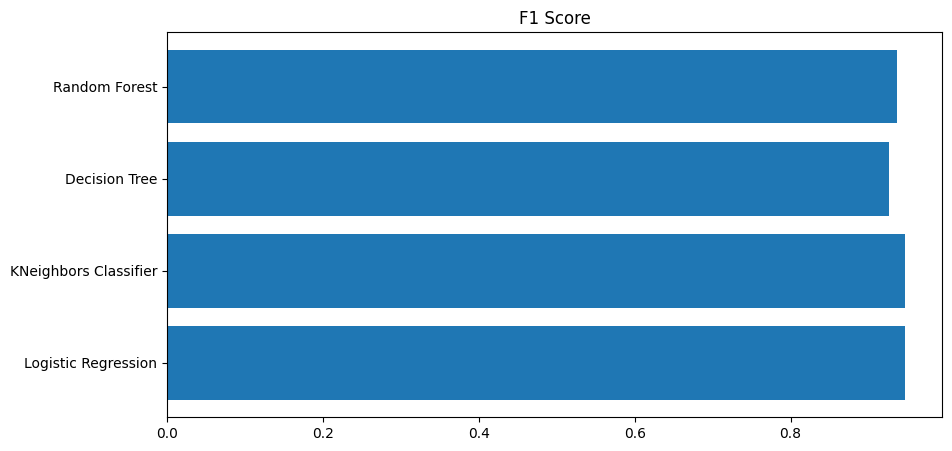

In [76]:
import matplotlib.pyplot as plt
import numpy as np

name = np.array(['Logistic Regression', 'KNeighbors Classifier', 'Decision Tree', 'Random Forest'])
test_score = np.array([logistic_F1, kneig_F1, dtree_F1, rforest_F1])
for i in range(len(name)):
    print(name[i],':', test_score[i])
plt.figure(figsize = (10, 5))
plt.barh(name, test_score)
plt.title('F1 Score')
plt.show()